In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_parquet('G:\\Mi unidad\\DATA SCIENCE\\PYNTHON\\VSC\\Prediccion_Bicicletas\\data\\processed\\train_eda.parquet') # Esto es importante, porque el parquet guarda los tipos de datos originales, en cambio el csv no.

In [29]:
data

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
dteday,,,,,,,,,,,,,
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.24,0.2879,0.81,0.0000,16
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.22,0.2727,0.80,0.0000,40
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.22,0.2727,0.80,0.0000,32
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.24,0.2879,0.75,0.0000,13
2011-01-01,Invierno,2011,Enero,Madrugada,No_Feriado,Sábado,Día_No_Laborable,Despejado,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-07,Verano,2012,Agosto,Mañana,No_Feriado,Martes,Día_Laborable,Niebla_Nublado,0.70,0.6667,0.74,0.1343,502
2012-08-07,Verano,2012,Agosto,Mañana,No_Feriado,Martes,Día_Laborable,Niebla_Nublado,0.70,0.6515,0.70,0.1642,705
2012-08-07,Verano,2012,Agosto,Mañana,No_Feriado,Martes,Día_Laborable,Niebla_Nublado,0.70,0.6667,0.74,0.1343,327


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13903 entries, 2011-01-01 to 2012-08-07
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      13903 non-null  category
 1   yr          13903 non-null  category
 2   mnth        13903 non-null  category
 3   hr          13903 non-null  category
 4   holiday     13903 non-null  category
 5   weekday     13903 non-null  category
 6   workingday  13903 non-null  category
 7   weathersit  13903 non-null  category
 8   temp        13903 non-null  float64 
 9   atemp       13903 non-null  float64 
 10  hum         13903 non-null  float64 
 11  windspeed   13903 non-null  float64 
 12  cnt         13903 non-null  int64   
dtypes: category(8), float64(4), int64(1)
memory usage: 762.0 KB


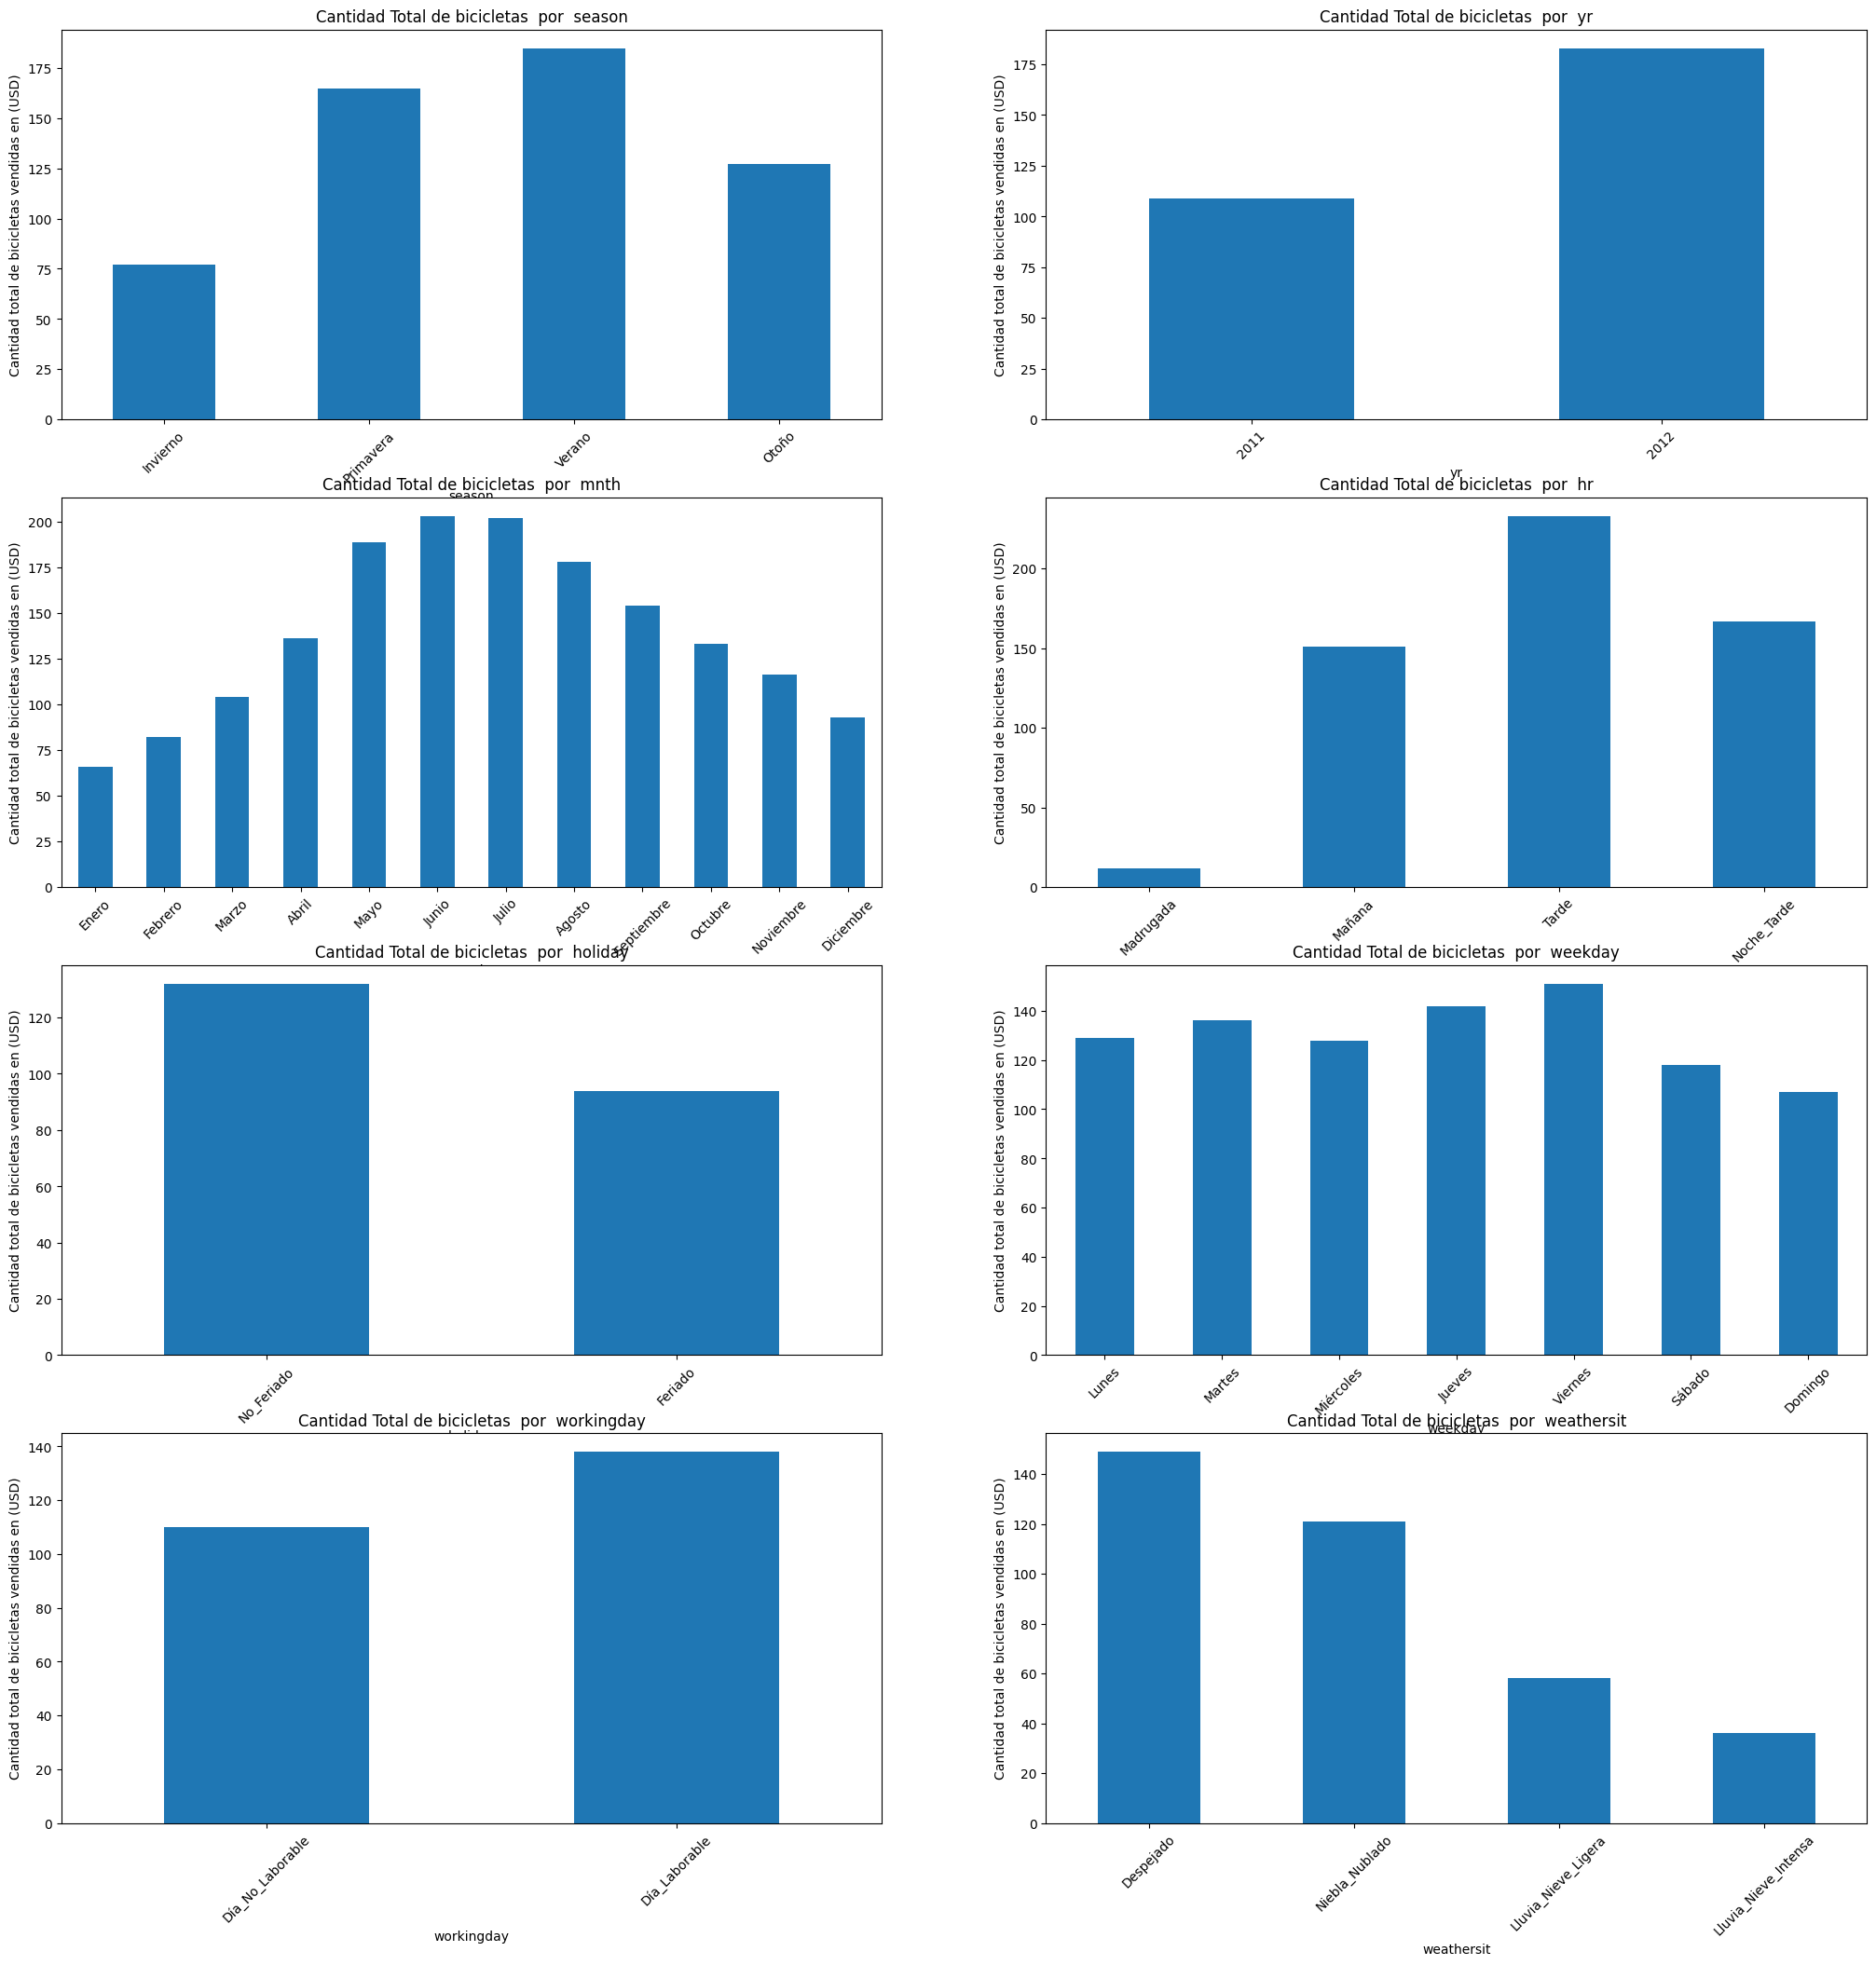

In [31]:


# Haremos un lienzo de gráficos de 4 x 2 de para graficos de barras
# El eje x será cada una de las variables categóricas y el eje y es mean 'cnt'

fig, axes = plt.subplots(4, 2, figsize=(25, 25))
for i, categoria in enumerate(categorias):
    ax = axes[i // 2, i % 2]
    data.groupby(categoria)['cnt'].median().plot(kind='bar', ax=ax)
    ax.set_title(f'Cantidad Total de bicicletas  por  {categoria}')
    ax.set_xlabel(categoria)
    ax.set_ylabel('Cantidad total de bicicletas vendidas en (USD)')
    ax.tick_params(axis='x', rotation=45)

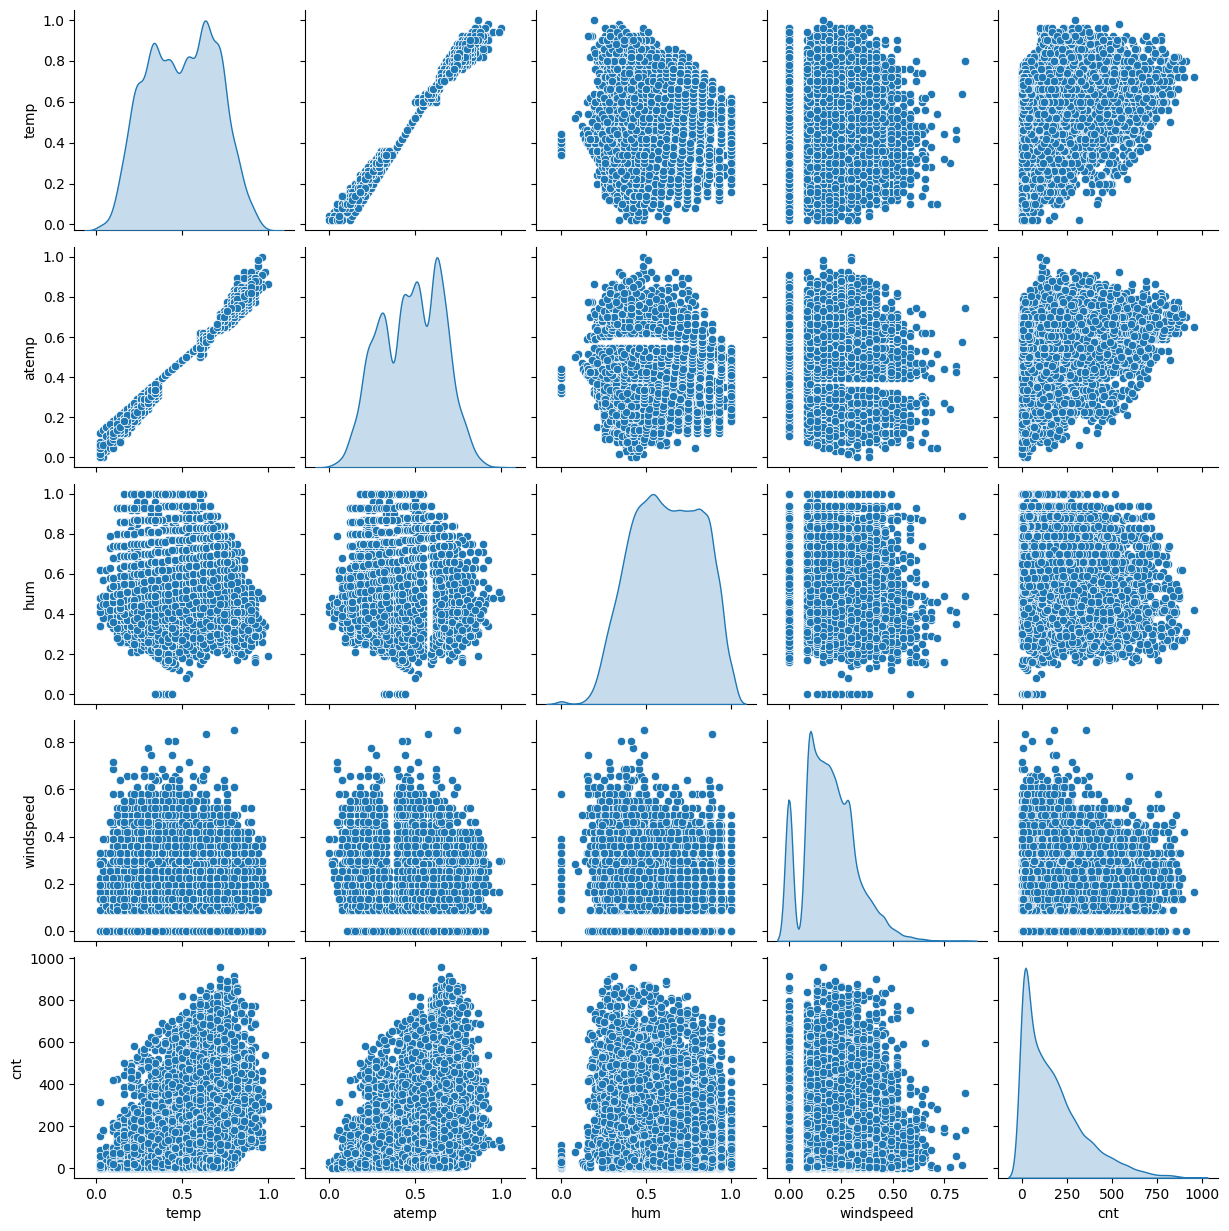

In [36]:
import seaborn as sns

sns.pairplot(data.select_dtypes(exclude= 'category'),diag_kind='kde')

<Axes: >

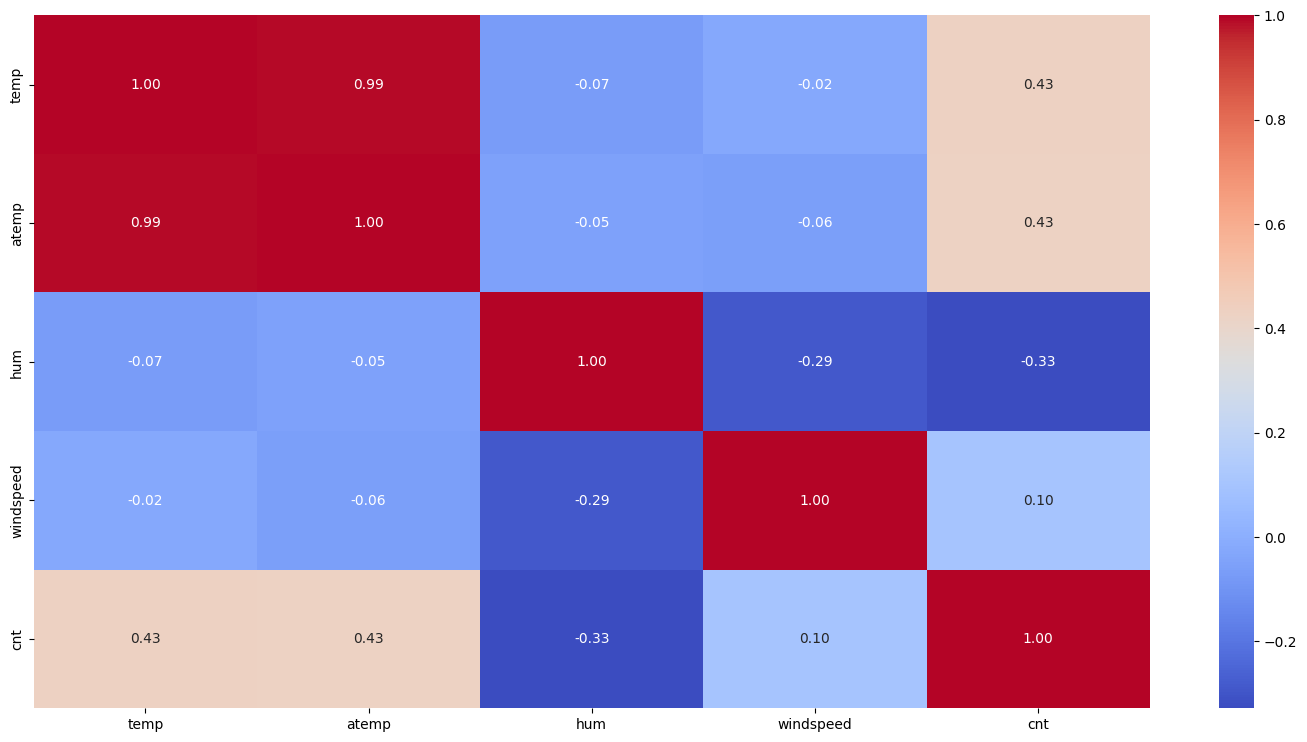

In [43]:
plt.figure(figsize=(18, 9))
sns.heatmap(data.select_dtypes(exclude= 'category').corr(), annot=True, fmt=".2f",cmap = 'coolwarm')